In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics #

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mhmmd-nauman/DataSets/master/black-box-models/CP-Nets/wpbc/original%20ds/wpbc%20-%20complete.csv")

print(df.head)

<bound method NDFrame.head of     Outcome  Time  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0         N    31        18.02         27.60          117.50     1013.0   
1         N    61        17.99         10.38          122.80     1001.0   
2         N   116        21.37         17.44          137.50     1373.0   
3         N   123        11.42         20.38           77.58      386.1   
4         R    27        20.29         14.34          135.10     1297.0   
..      ...   ...          ...           ...             ...        ...   
189       N     3        14.72         25.26           99.28      657.5   
190       N    10        22.52         21.92          146.90     1597.0   
191       N     8        15.44         31.18          101.00      740.4   
192       N    12        17.17         29.19          110.00      915.3   
193       N     6        16.70         28.13          110.30      885.4   

     Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave 

In [ ]:
#df=df[df.columns[:-1]]

In [ ]:
df.head()

,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor size,Lymph node status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
df['Outcome'] = labelencoder_X_1.fit_transform(df['Outcome'])

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df = clean_dataset(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


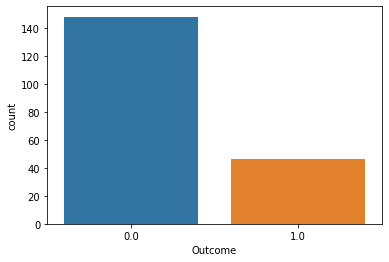

In [ ]:
sns.countplot(df['Outcome'],label="Count")

In [ ]:
df.columns[1:34]

Index(['Time', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area',
       'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'SE Area', 'SE Smoothness',
       'SE Compactness', 'SE Concavity', 'SE Concave Points', 'SE Symmetry',
       'SE Fractal Dimension', 'Worst Radius', 'Worst Texture',
       'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
       'Worst Compactness', 'Worst Concavity', 'Worst Concave Points',
       'Worst Symmetry', 'Worst Fractal Dimension', 'Tumor size',
       'Lymph node status'],
      dtype='object')

In [ ]:
#prediction_var = ['Application Status','SSC','Admission Test','Terminal Degree','Document Verified','Domicile','Gender','Province','English Marks']

In [ ]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(135, 34)
(59, 34)


In [ ]:
data_df= list(df.columns[1:34]) 
data_df_main = df.loc[:,data_df]

In [ ]:
train_X = train[df.columns[1:34]]# taking the training data input 
train_y=train.Outcome # This is output of our training data
# same we have to do for test
test_X= test[df.columns[1:34]] # taking test data inputs
test_y =test.Outcome   #output value of test dat
y_test = test_y

In [ ]:
model=RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(train_X,train_y)# 

RandomForestClassifier()

In [ ]:
y_pred=model.predict(test_X)

In [ ]:
metrics.accuracy_score(y_pred,y_test)

0.8305084745762712

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sp = tn / (tn+fp)
Sn = tp/(tp + fn)

In [ ]:
print(cm)
print(Sp)
print(Sn)

[[44  0]
 [10  5]]
1.0
0.3333333333333333


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, y_pred)
print(cohen_score)

0.4271844660194175
